In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("files_for_lab\csv_files\marketing_customer_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [2]:
numeric = data.select_dtypes(include=[np.number])
numeric

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [3]:
Y=numeric["Total Claim Amount"]
numeric_x=numeric.drop(["Number of Open Complaints","Number of Policies","Total Claim Amount"],axis=1)
numeric_x["Income"]=numeric_x["Income"].replace(0,numeric_x["Income"].mean())
numeric_x

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,2763.519279,56274.000000,69,32,5
1,6979.535903,37657.380009,94,13,42
2,12887.431650,48767.000000,108,18,38
3,7645.861827,37657.380009,106,18,65
4,2813.692575,43836.000000,73,12,44
...,...,...,...,...,...
9129,23405.987980,71941.000000,73,18,89
9130,3096.511217,21604.000000,79,14,28
9131,8163.890428,37657.380009,85,9,37
9132,7524.442436,21941.000000,96,34,3


**Normalizing with boxcox**

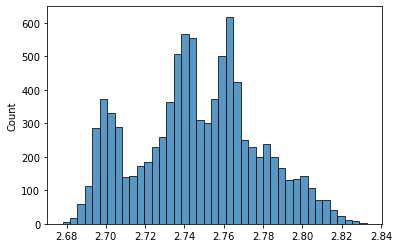

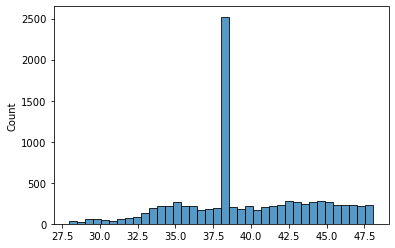

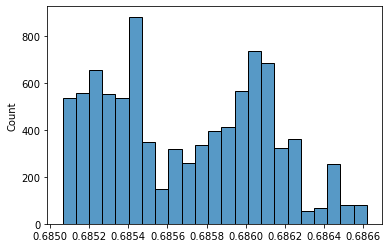

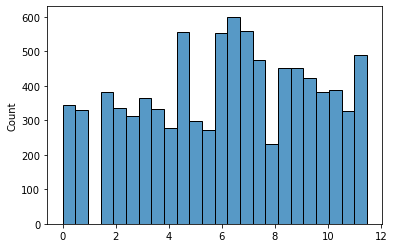

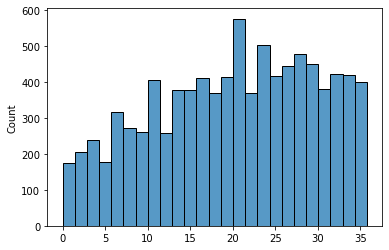

In [4]:
for col in numeric_x.columns:
    numeric_x[col]=numeric_x[col].replace(0,numeric_x[col].mean())
    arr, lmbda=stats.boxcox(numeric_x[col])
    numeric_x[col]=arr
    sns.histplot(arr)
    plt.show()

# One Hot/Label Encoding (categorical).

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

categ = data.select_dtypes(include=[np.object])
categ

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [6]:
categ_x=categ.drop(["Customer","Effective To Date"],axis=1)
categ_x

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [7]:
for col in categ_x.columns:
    categ_x[col]=LabelEncoder().fit(categ_x[col]).transform(categ_x[col])

categ_x

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,1,1,2,1,1,3,1,3,0,1
9130,1,1,1,1,1,0,1,0,0,2,0,1,0,1
9131,1,0,1,0,4,1,1,2,0,1,0,1,0,1
9132,1,0,1,1,1,1,1,1,1,4,2,1,0,0


# Concat DataFrames

In [8]:
numeric_x

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,2.703839,42.114983,0.685347,10.809132,3.017301
1,2.754926,38.346277,0.685871,5.783269,18.770387
2,2.780772,40.735368,0.686039,7.311427,17.380225
3,2.759125,38.346277,0.686018,7.311427,26.144855
4,2.704995,39.734641,0.685461,5.448624,19.451130
...,...,...,...,...,...
9129,2.801170,44.579684,0.685461,7.311427,33.067968
9130,2.711030,33.627127,0.685606,6.106927,13.703207
9131,2.762062,38.346277,0.685725,4.363742,17.026248
9132,2.758397,33.751319,0.685898,11.248499,1.667661


In [9]:
data_w=pd.DataFrame(np.concatenate((numeric_x,categ_x),axis=1)).reset_index(drop=True)
data_w

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2.703839,42.114983,0.685347,10.809132,3.017301,4.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,5.0,1.0
1,2.754926,38.346277,0.685871,5.783269,18.770387,0.0,0.0,1.0,0.0,4.0,0.0,1.0,2.0,1.0,5.0,2.0,0.0,0.0,1.0
2,2.780772,40.735368,0.686039,7.311427,17.380225,2.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,0.0,0.0,5.0,1.0
3,2.759125,38.346277,0.686018,7.311427,26.144855,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,1.0
4,2.704995,39.734641,0.685461,5.448624,19.451130,4.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.801170,44.579684,0.685461,7.311427,33.067968,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0
9130,2.711030,33.627127,0.685606,6.106927,13.703207,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
9131,2.762062,38.346277,0.685725,4.363742,17.026248,1.0,0.0,1.0,0.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0
9132,2.758397,33.751319,0.685898,11.248499,1.667661,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0


In [10]:
data_w.columns = list(numeric_x.columns) + list(categ_x.columns)
data_w

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2.703839,42.114983,0.685347,10.809132,3.017301,4.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,5.0,1.0
1,2.754926,38.346277,0.685871,5.783269,18.770387,0.0,0.0,1.0,0.0,4.0,0.0,1.0,2.0,1.0,5.0,2.0,0.0,0.0,1.0
2,2.780772,40.735368,0.686039,7.311427,17.380225,2.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,0.0,0.0,5.0,1.0
3,2.759125,38.346277,0.686018,7.311427,26.144855,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,1.0
4,2.704995,39.734641,0.685461,5.448624,19.451130,4.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.801170,44.579684,0.685461,7.311427,33.067968,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0
9130,2.711030,33.627127,0.685606,6.106927,13.703207,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
9131,2.762062,38.346277,0.685725,4.363742,17.026248,1.0,0.0,1.0,0.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0
9132,2.758397,33.751319,0.685898,11.248499,1.667661,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0


# Train-test split.

In [11]:
X=data_w
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2.703839,42.114983,0.685347,10.809132,3.017301,4.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,5.0,1.0
1,2.754926,38.346277,0.685871,5.783269,18.770387,0.0,0.0,1.0,0.0,4.0,0.0,1.0,2.0,1.0,5.0,2.0,0.0,0.0,1.0
2,2.780772,40.735368,0.686039,7.311427,17.380225,2.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,0.0,0.0,5.0,1.0
3,2.759125,38.346277,0.686018,7.311427,26.144855,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,1.0
4,2.704995,39.734641,0.685461,5.448624,19.451130,4.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.801170,44.579684,0.685461,7.311427,33.067968,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0
9130,2.711030,33.627127,0.685606,6.106927,13.703207,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
9131,2.762062,38.346277,0.685725,4.363742,17.026248,1.0,0.0,1.0,0.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0
9132,2.758397,33.751319,0.685898,11.248499,1.667661,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0


In [12]:
Y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [14]:
import statsmodels.api as sm

model=sm.OLS(y_train,x_train).fit()

X.to_csv("final_X.csv")
Y.to_csv("final_Y.csv")

In [15]:
predictions=model.predict(x_test)

In [16]:
from sklearn.metrics import r2_score

#R2

r2=r2_score(y_test,predictions)
r2

0.32299881793231155

# Apply linear regression.

In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

In [18]:
predictions=reg.predict(x_test)

#R2

r2=r2_score(y_test,predictions)
r2

0.5019695624856497

### MSE

In [19]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,predictions)
mse

39569.96545401884

### RMSE

In [20]:
rmse=mean_squared_error(y_test,predictions,squared=False)
rmse

198.92200847070401

### MAE

In [21]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(y_test,predictions)
mae

144.75547260966835